In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [43]:
def old_add_metadata(metadata, features):
    names = [x.split("-") for x in features[0]]
    ids = [int(x[2].replace(".wav",'')) for x in names]
    ordered_metadata = pd.DataFrame()
    for i in ids:
        df = metadata[metadata.Recording_ID == i]
        ordered_metadata = ordered_metadata.append(df,ignore_index=True)
    return ordered_metadata.join(features)

In [44]:
def add_metadata(metadata, features):
    names = [x.split("-") for x in features['sound.files']]
    ids = [int(x[2].replace(".wav",'')) for x in names]
    ordered_metadata = pd.DataFrame()
    for i in ids:
        df = metadata[metadata.Recording_ID == i]
        ordered_metadata = ordered_metadata.append(df,ignore_index=True)
    X = ordered_metadata.join(features)
    good_rows = features.iloc[:,1:].apply(lambda x : not np.any(np.isnan(x)), axis = 1)
    return X[good_rows]

In [45]:
%matplotlib notebook
#2d PCA plotting
def _2d_plot_pca(species, X): #len(species) = nrows(X)
    pca = PCA(n_components=2)
    pca.fit(X);
    df = pd.DataFrame()
    df['species'] = species
    everything = X.join(df)
    for i in everything.groupby('species').__iter__():
        tuples = pca.transform(i[1].drop('species',axis=1))
        xs = tuples[:,0]
        ys = tuples[:,1]
        plt.scatter(xs, ys);
    plt.show()

In [46]:
%matplotlib notebook
#3d PCA plotting
def _3d_plot_pca(species, X): #len(species) = nrows(X)
    pca = PCA(n_components=3)
    pca.fit(X);
    df = pd.DataFrame()
    df['species'] = species
    everything = X.join(df)
    fig = plt.figure()
    ax = fig.add_subplot(111,projection = '3d')
    for i in everything.groupby('species').__iter__():
        tuples = pca.transform(i[1].drop('species',axis=1))
        xs = tuples[:,0]
        ys = tuples[:,1]
        zs = tuples[:,2]
        ax.scatter(xs, ys, zs);
    plt.show()

In [47]:
#2d LDA plotting
def _2d_plot_lda(species, X, y): #len(species) = nrows(X)
    lda = LinearDiscriminantAnalysis(n_components = 2)
    lda.fit(X,y);
    df = pd.DataFrame()
    df['species'] = species
    everything = X.join(df)
    for i in everything.groupby('species').__iter__():
        tuples = lda.transform(i[1].drop('species',axis=1))
        xs = tuples[:,0]
        ys = tuples[:,1]
        plt.scatter(xs, ys);
    plt.show()

In [48]:
#3d LDA plotting
def _3d_plot_lda(species, X, y): #len(species) = nrows(X)
    lda = LinearDiscriminantAnalysis(n_components=3)
    lda.fit(X,y);
    df = pd.DataFrame()
    df['species'] = species
    everything = X.join(df)
    fig = plt.figure()
    ax = fig.add_subplot(111,projection = '3d')
    for i in everything.groupby('species').__iter__():
        tuples = lda.transform(i[1].drop('species',axis=1))
        xs = tuples[:,0]
        ys = tuples[:,1]
        zs = tuples[:,2]
        ax.scatter(xs, ys, zs);
    plt.show()

In [49]:
features = pd.read_csv('/home/dan/Bird/Analysis/feature_vector.csv',header = None, names=["sound.files","selec","duration","meanfreq","sd","freq.median","freq.Q25","freq.Q75","freq.IQR","time.median","time.Q25","time.Q75","time.IQR","skew","kurt","sp.ent","time.ent","entropy","sfm","meandom","mindom","maxdom","dfrange","modindx","startdom","enddom","dfslope","meanpeakf"
])
metadata = pd.read_csv('/home/dan/Bird/Analysis/USA_Texas_A.csv', encoding = "ISO-8859-1")

In [50]:
good_boi = add_metadata(metadata,features)

In [51]:
species = good_boi.Genus + good_boi.Specific_epithet
y = species.astype("category").cat.codes

In [52]:
X = good_boi.iloc[:,18:]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [53]:
model = LinearDiscriminantAnalysis(n_components = 2)
model.fit(X_train,y_train);
model.score(X_test,y_test)

/home/dan/miniconda3/envs/hic-param-est/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.32894736842105265

/home/dan/miniconda3/envs/hic-param-est/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


<IPython.core.display.Javascript object>


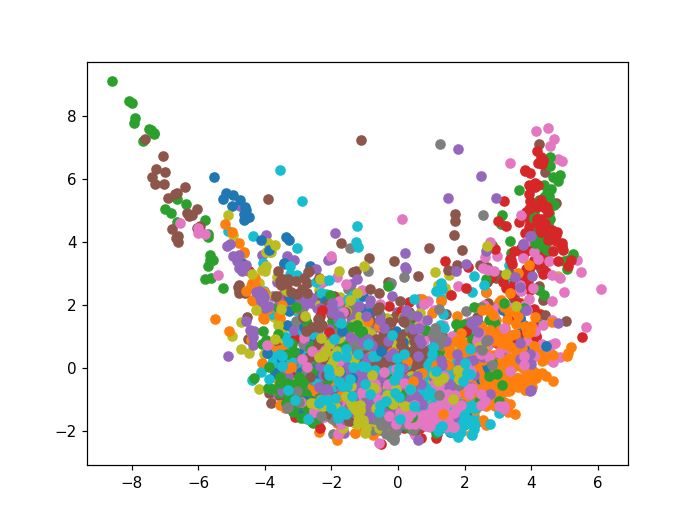

In [54]:
#_2d_plot_pca(species,X)
_2d_plot_lda(species,X,y)

/home/dan/miniconda3/envs/hic-param-est/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


<IPython.core.display.Javascript object>


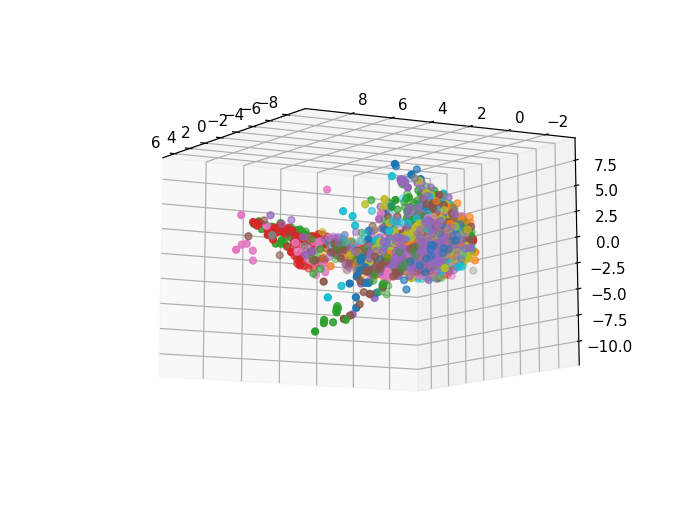

In [55]:
#_3d_plot_pca(species,X)
_3d_plot_lda(species,X,y)

In [16]:
nX = pd.DataFrame.from_records(preprocessing.normalize(X))

C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


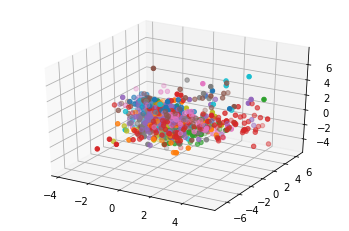

In [17]:
_3d_plot_lda(species,nX,y)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
nX_train, nX_test, ny_train, ny_test = train_test_split(nX, y, random_state=1)

In [19]:
model = LinearDiscriminantAnalysis()
model.fit(X_train,y_train);
print(model.score(X_test,y_test))

model = LinearDiscriminantAnalysis()
model.fit(nX_train,ny_train);
print(model.score(nX_test,ny_test))

0.3859060402684564
0.2986577181208054


C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [20]:
print(len(species.unique()))

85


In [21]:
X_train.shape

(894, 27)

In [28]:
id = [[int(i==j) for j in range(27)] for i in range(27)]

In [42]:
model = LinearDiscriminantAnalysis(n_components = 3)
model.fit(X,y);
model.transform(id)

C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


array([[  49.08204206,  -61.71653265,  -38.17006529],
       [  50.90792245,  -66.86692535,  -17.8754391 ],
       [  48.79239793,  -61.7058757 ,  -39.29060295],
       [  47.74260495,  -63.43723838,  -38.63294768],
       [  49.1666494 ,  -62.46299213,  -37.57325881],
       [  48.7314712 ,  -62.74799012,  -37.79078603],
       [  49.25673686,  -61.88124152,  -37.5211575 ],
       [  49.45942933,  -61.4835885 ,  -37.48398887],
       [  50.68104213,  -49.95634044,  -42.53140971],
       [  37.46290379,  -56.99541477,  -61.95382853],
       [  46.20074922,  -60.85757898,  -43.53374405],
       [  49.08666471,  -62.3434317 ,  -37.1238317 ],
       [  48.94322459,  -62.06684192,  -38.33558469],
       [  49.06424679,  -61.68898393,  -38.160535  ],
       [  -5.85544791,   14.20407431,    7.52247708],
       [  -7.2698141 ,   19.80756293,   21.21256946],
       [ 115.44564738, -154.45151434, -112.6076549 ],
       [  53.11065999,  -51.00251728,  -32.74620058],
       [  48.86615086,  -61.

In [37]:
X.shape

(1192, 27)

In [38]:
y.shape

(1192,)

In [40]:
y.unique().shape

(85,)